In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import RDistModel, PSF
from colicoords import CellListPlot, save, load, SynthCellList, CellPlot
from tqdm import tqdm_notebook
import numpy as np

C:\Miniconda3\envs\py_main\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
lengths = np.random.normal(40, 5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

<IPython.core.display.Javascript object>


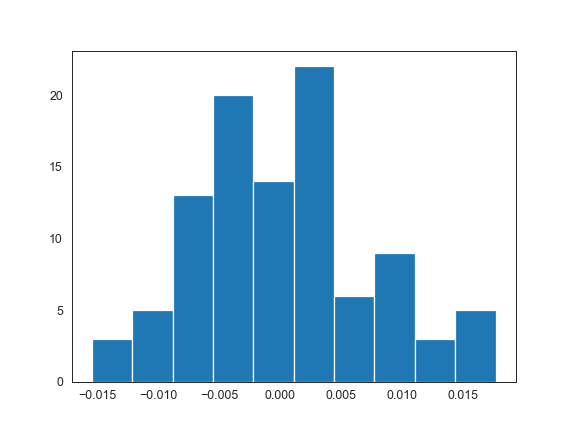

In [3]:
plt.figure()
h = plt.hist(curvatures)

In [16]:
cell_list = SynthCellList(lengths, radii, curvatures)

<IPython.core.display.Javascript object>


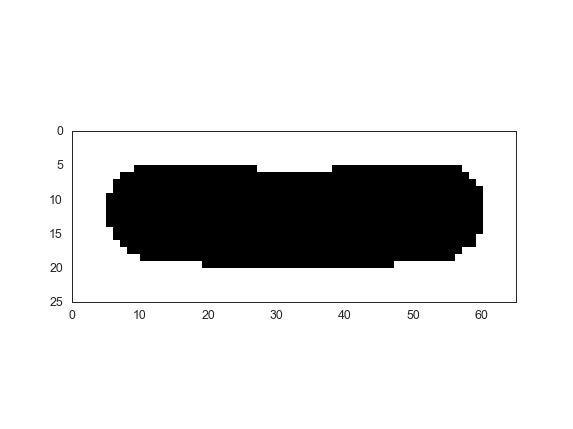

In [5]:
plt.figure()
cp = CellPlot(cell_list[10])
cp.imshow('binary')

In [15]:
cell_list = SynthCellList(lengths, radii, curvatures)
psf = PSF(1.54)
rmodel = RDistModel(psf)
for cell in tqdm_notebook(cell_list):
    a2 = np.random.normal(0.85, 0.07)
    a1 = 1 - a2
    r1 = cell.coords.r
    r2 = 0.9*cell.coords.r
    par_dict = {'a1':a1, 'a2':a2, 'r1':r1, 'r2':r2}
    rmodel.sub_par(par_dict)
    
    cell.add_radial_model_data(rmodel, num=100)

AttributeError: 'RDistModel' object has no attribute 'sub_par'

In [22]:
save('cells_temp.hdf5', cell_list)

In [26]:
cl_bak = cell_list

In [69]:
cl_bk2 = cell_list.copy()

In [39]:
for cell in cell_list:
    try:
        del cell.data.data_dict['storm']
    except:
        pass
    try:
        del cell.data.storm_dict['storm']
    except:
        pass

In [17]:
for cell in tqdm_notebook(cell_list):
    num = int(np.random.normal(4, 8))
    cell.add_storm_membrane(num, 0.9*cell.coords.r, r_std=0.1*cell.coords.r)

In [18]:
sigma_value = 1.54

for cell in cell_list:
    xmax = cell.data.shape[1]
    ymax = cell.data.shape[0]
    step = 1
    xi = np.arange(step / 2, xmax, step)
    yi = np.arange(step / 2, ymax, step)

    x_coords = np.repeat(xi, len(yi)).reshape(len(xi), len(yi)).T
    y_coords = np.repeat(yi, len(xi)).reshape(len(yi), len(xi))
    x, y = cell.data.data_dict['storm']['x'], cell.data.data_dict['storm']['y']
    
    img = np.zeros_like(x_coords)
    intensities = np.ones_like(x)
    sigma = np.ones_like(x)*sigma_value
    for _sigma, _int, _x, _y in zip(sigma, intensities, x, y):
        img += _int * np.exp(-(((_x - x_coords) / _sigma) ** 2 + ((_y - y_coords) / _sigma) ** 2) / 2)
        
    cell.data.add_data(img, 'fluorescence')

<IPython.core.display.Javascript object>


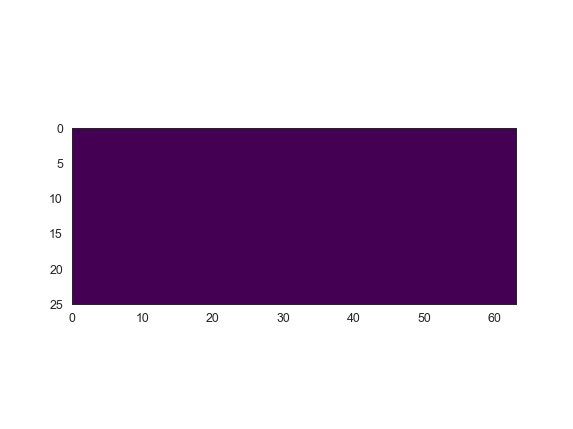

In [19]:
plt.figure()
cp = CellPlot(cell_list[0])
cp.imshow('fluorescence')
cp.plot_storm(method='plot')

In [75]:
save('fake_data_new.hdf5', cell_list)